## Decompose number into sum of squares

## Trivial algorithm

Returns one of the many sum of square decompositions. Favors splits from the middle of the number-ish, for prettier visuals

In [40]:
function get_squares(num, squares = [])
    part1 = 0
    if num==1
        part1=1
    else
        # for i in Iterators.reverse(1:num-1) # normal
        for i in Iterators.reverse(1:floor(Integer, num/2)) # just for asthetics
            if floor(√i) == √i
                part1=i
                break
            end
        end
    end
    push!(squares, part1)
    part2 = num - part1
    if part2>0
        get_squares(part2, squares)
    else
        return squares
    end

end

get_squares(36)

10-element Vector{Any}:
 16
  9
  4
  1
  1
  1
  1
  1
  1
  1

### [todo] Better algorithm
Ideally, would give us all the sum of square decompositions

## Plot triangles from sum of squares

In [7]:
using Plots
import LinearAlgebra:norm

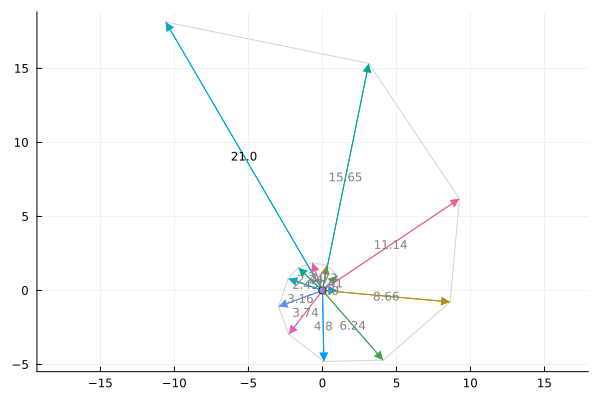

In [41]:
# nums = [1,1,3,5] # 6sq = 1sq + 1sq +..5sq
num_to_decompose = 21
nums = map(√,reverse(get_squares(num_to_decompose^2)))

plot(aspect_ratio=:equal)
prev_vec = 0
cur_vec = 0
for i in 1:length(nums)
    if i==1
        cur_vec = [nums[i],0]
    else
        θ = atan(nums[i]/norm(prev_vec))
        r = norm([nums[i], norm(prev_vec)])
        rot_scale_matrix = r*[cos(θ) -sin(θ); sin(θ) cos(θ)]
        cur_vec = rot_scale_matrix * (prev_vec/norm(prev_vec))
        plot!([prev_vec[1],cur_vec[1]], [prev_vec[2],cur_vec[2]], label=nothing, color="lightgrey")
    end

    # Plotting main vectors and annotation
    plot!([0,cur_vec[1]], [0,cur_vec[2]], label=nothing, arrow=(:closed), )
    color = :grey
    if i==length(nums)
        color= :black
    end
    annotate!([0.5cur_vec[1]],[0.5cur_vec[2]],text(round(norm(cur_vec), digits=2),color, 8))

    prev_vec = cur_vec
end

scatter!([0],[0], label=nothing)
current()